<a href="https://colab.research.google.com/github/nidhi-1910/major-project/blob/main/Final_SVM_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [ ]:
# Load the CSV file
df = pd.read_csv('/content/major project dataset.csv')

X = df[['Circumferential extent','Radial extent','Texture area density','Depth ratio']]
y = df['Load carrying capacity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# Create an SVR model
svr = svm.SVR(kernel='rbf', C=100, epsilon=0.001, gamma='scale')

# Train the model
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)

In [ ]:
print('error%:', np.mean(np.abs(y_pred - y_test) / y_test * 100))

# Print the actual and predicted values
df_test = pd.DataFrame(X_test, columns=['Circumferential extent','Radial extent','Texture area density','Depth ratio'])
df_test['Actual'] = y_test
df_test['Predicted'] = y_pred
df_test['error percentage'] = percentage_error = abs(y_pred - y_test) / y_test * 100

print(df_test)

error%: 2.369662341149894
    Circumferential extent  Radial extent  Texture area density  Depth ratio  \
50                     0.6            0.6              0.250000     1.000000   
6                      0.4            0.6              0.390625     1.333333   
51                     0.4            0.4              0.250000     1.333333   
54                     0.6            0.6              0.250000     1.333333   
53                     0.4            0.8              0.250000     1.000000   
88                     0.8            0.8              0.562500     1.333333   
32                     0.4            0.2              0.250000     1.333333   
31                     0.6            0.4              0.250000     1.000000   
21                     0.2            0.6              0.390625     1.000000   
82                     0.4            0.4              0.562500     1.333333   
43                     0.8            0.8              0.250000     1.000000   
47            

In [ ]:
input1 = float(input('Enter the Circumferential extent:'))
input2 = float(input('Enter the Radial extent:'))
input3 = float(input('Enter the Texture area :'))
input4 = float(input('Enter the Depth ratio:'))

predicted_LCC = svr.predict([[input1,input2,input3,input4]])

print('The predicted Load carrying capacity is:', predicted_LCC[0])

Enter the Circumferential extent:0.1
Enter the Radial extent:0.1
Enter the Texture area :0.1
Enter the Depth ratio:0.1
The predicted Load carrying capacity is: 0.08720818712418996


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [ ]:
# Calculate the errors
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = np.sqrt(mean_absolute_error(y_test, y_pred))
r2_score = np.sqrt(r2_score(y_test, y_pred))

# Print the errors
print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("r2_score:", r2_score)

RMSE: 0.0054791085029708645
MSE: 0.0054791085029708645
MAE: 0.06291642009143335
r2_score: 0.9963496459352045


In [ ]:
# Set a threshold for converting continuous predictions into class labels
threshold = 0.19

# Convert continuous predictions into class labels
Actual_binary = [1 if a > threshold else 0 for a in np.array(y_test)]
predicted_labels = [1 if p > threshold else 0 for p in np.array(y_pred)]

print("Actual:", np.array(y_test))
print("Actual_binary:", Actual_binary)
print("Predicted:", np.array(y_pred))
print("Predicted labels:", predicted_labels)

Actual: [0.15924527 0.2018635  0.14524699 0.19014228 0.1510746  0.40174271
 0.12024291 0.1432995  0.13648098 0.22498257 0.16495854 0.11871713
 0.17720711 0.10434152 0.19950408 0.11894386 0.11892463 0.19836732
 0.20040709]
Actual_binary: [0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1]
Predicted: [0.16277526 0.20003944 0.14703342 0.18892111 0.14985191 0.38501694
 0.12813726 0.14875077 0.13492954 0.22617136 0.16191603 0.12826071
 0.17230176 0.10678572 0.19887148 0.12040093 0.11576268 0.19390853
 0.20357613]
Predicted labels: [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1]


In [ ]:
# Calculate the confusion matrix
conf_matrix = metrics.confusion_matrix(Actual_binary, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[12  0]
 [ 1  6]]


In [ ]:
# Change the average parameter to 'micro', 'macro', 'weighted', or None
recall = metrics.recall_score(Actual_binary, predicted_labels )
print("Recall:", recall)

Recall: 0.8571428571428571


In [ ]:
# Change the average parameter to 'micro', 'macro', 'weighted', or None
accuracy = metrics.accuracy_score(Actual_binary, predicted_labels)
print("accuracy:", accuracy)

accuracy: 0.9473684210526315


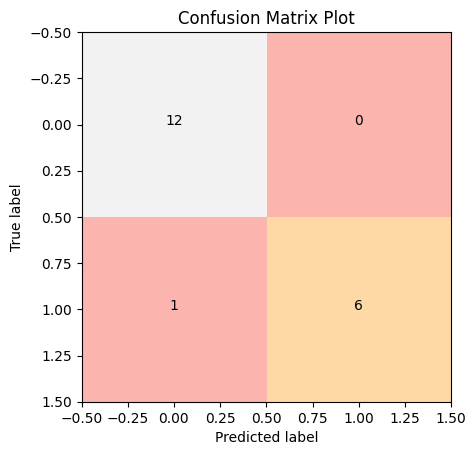

In [ ]:
# Plot the confusion matrix
plt.title('Confusion Matrix Plot')
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Add annotations to each cell
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j],
                 horizontalalignment="center",
                 color="black" if conf_matrix[i, j] else "black")
plt.imshow(conf_matrix, cmap='Pastel1')

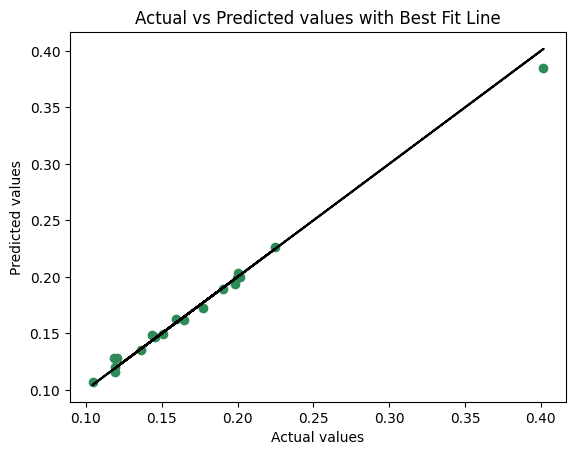

In [ ]:
# Plot the actual values vs predicted values with the best fit line
plt.figure()
plt.scatter(y_test, y_pred, color='seagreen', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='black', label='Best fit line')

# Add labels and legend
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values with Best Fit Line')

# Show plot
plt.show()

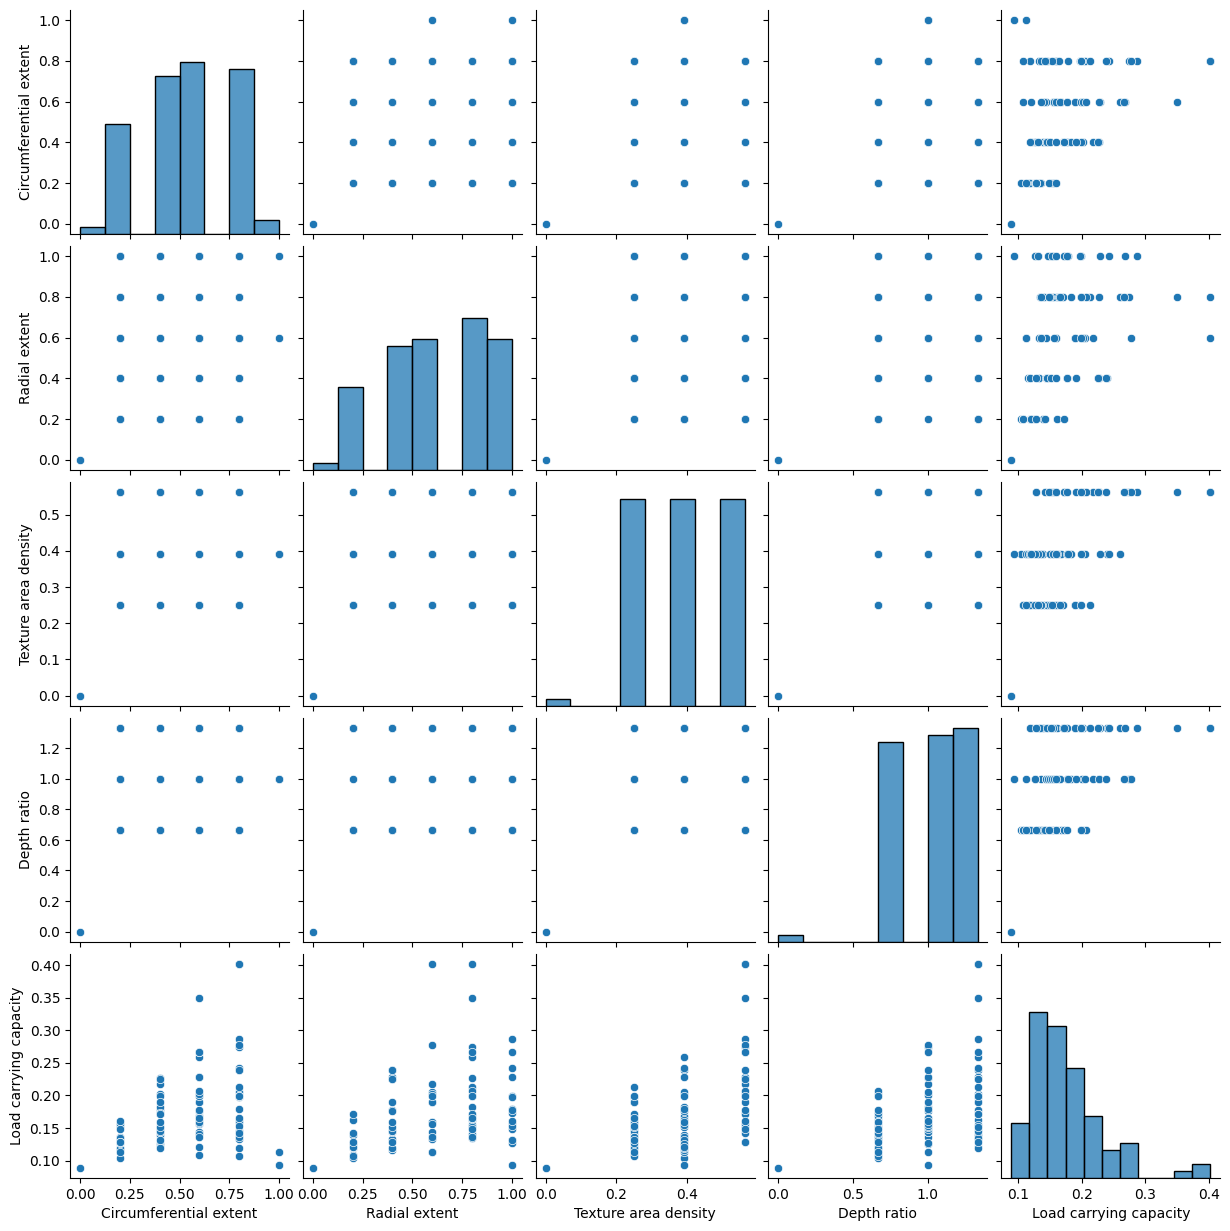

In [ ]:
sns.pairplot(df)

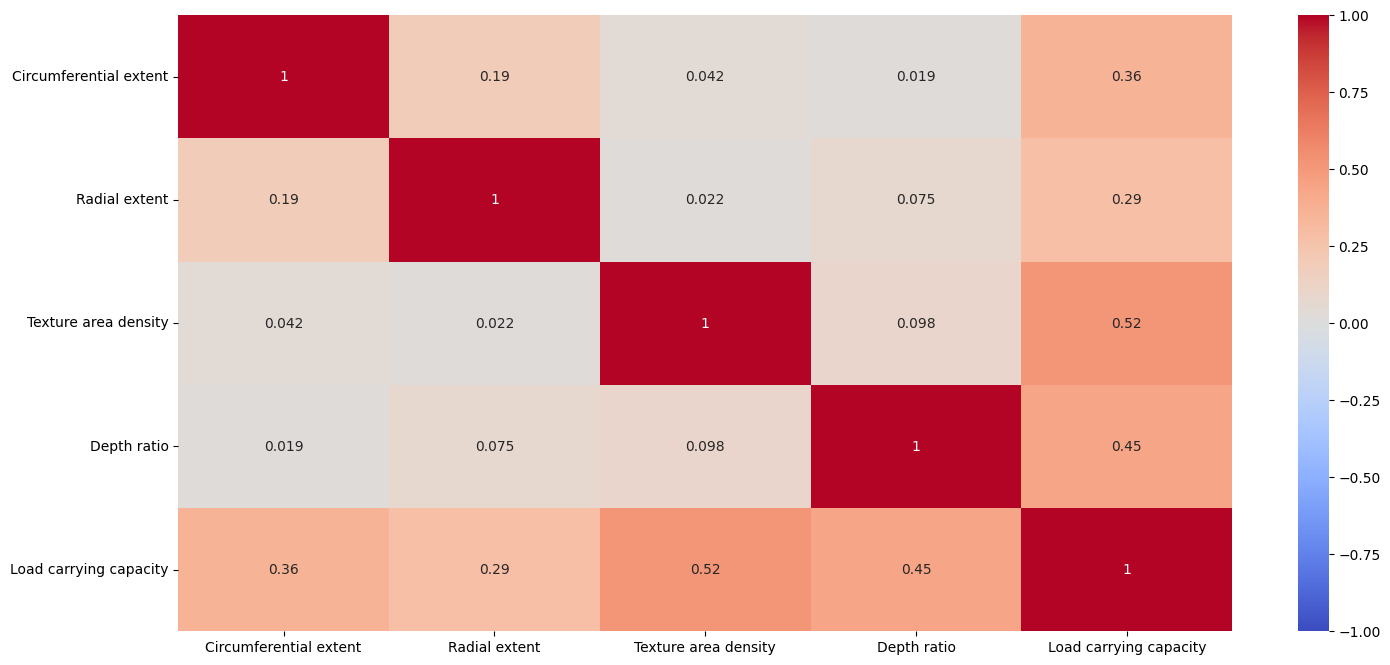

In [ ]:
correlation  = df.corr()
ax = plt.subplots(figsize=(17,8))
ax = sns.heatmap(correlation , vmin=-1, vmax=1 , annot=True ,cmap = "coolwarm")